# MLE 를 이용해 최적의 파라미터를 찾아보고, 데이터셋의 likelihood 도 계산해보기

아래 코드는 y = x +1 함수를 기준으로 랜덤한 노이즈를 섞어서 데이터 포인트 20개를 생성하고 시각화하는 코드. 데이터 생성 단계에서 지정한 노이즈의 분포는 평균이 0, 표준편차가 0.5 인 정규분포.

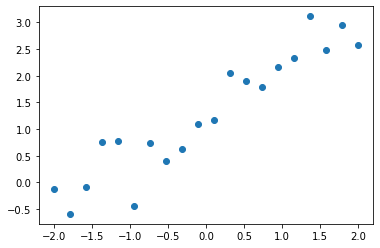

In [15]:
import math
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
num_samples = 20

input_data = np.linspace(-2, 2, num_samples)
labels = input_data +1 +np.random.normal(0, 0.5, size = num_samples)

plt.scatter(input_data, labels)
plt.show()

# likelihood 와 파라미터 계산


데이터를 생성할때는 노이즈 분포의 표준편차를 0.5 로 정했지만 데이터를 관찰하고 모델을 설계하는 입장에서는 노이즈의 원래 표준편차를 알수 없음. 노이즈의 표준편차를 0.1 로 가정했다고 해보자.

negative log likelihood 를 이용

In [16]:
def likelihood(labels, preds):
    result = 1/(np.sqrt(2*math.pi*0.1*0.1))*np.exp(-np.power(labels-preds,2)/(2*0.1*0.1))
    
    return np.prod(result)

def neg_log_likelihood(labels, preds):
    const_term = len(labels)*math.log(1/math.sqrt(2*math.pi*0.1*0.1))
    
    return (-1)*(const_term +1 / (2*0.1*0.1) *np.sum(-np.power(labels - preds, 2)))

slope0.8578bias: 1.2847
likelihood: 2.9724e-54
negative log likelihood: 1.2325e+02


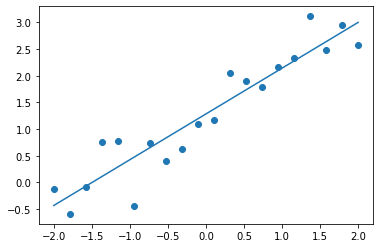

In [17]:
# X : 20 x 2 matrix  , y: 20 x 1 matrix
# input_data 리스트를 column vector 로 바꾼 다음 np.append 함수로 상수항을 추가

X = np.append(input_data.reshape((-1, 1)), np.ones((num_samples, 1)), axis=1)
y = labels

theta_1, theta_0 = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

print('slope' + '%.4f'%theta_1 + 'bias: ' + '%.4f'%theta_0)

predictions = theta_1 * input_data + theta_0
print('likelihood: ' +'%.4e'%likelihood(labels, predictions))
print('negative log likelihood: ' +'%.4e'%neg_log_likelihood(labels, predictions))

model_x = np.linspace(-2, 2, 50)
model_y = theta_1 * model_x + theta_0

plt.scatter(input_data, labels)
plt.plot(model_x, model_y)
plt.show()

위 코드로 구한 최적의 모델은 y = 0.8578x + 1.2847  데이터 포인트들이 y = x+1  함수로 부터 생성된 것을 생각하면 꽤 가까운 결과

# MAP 는 MLE 와 비슷하지만 정규화 항에 해당하는 negative log prior 가 존재

# 따라서 MAP  가 더 안정적임

# 이상치 (outlier) 가 있는 데이터 셋을 이용해 MAP 와  MLE 를 비교해보자

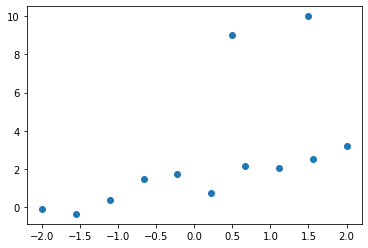

In [18]:
np.random.seed(0)
num_samples = 10

input_data = np.linspace(-2, 2, num_samples)
labels = input_data + 1 + np.random.normal(0, 0.5, size=num_samples)

input_data = np.append(input_data, [0.5, 1.5])
labels = np.append(labels, [9.0, 10.0])

plt.scatter(input_data, labels)
plt.show()

In [19]:
def likelihood(labels, preds):
    result = 1/(np.sqrt(2*math.pi*0.1*0.1))*np.exp(-np.power(labels-preds,2)/(2*0.1*0.1))
    
    return np.prod(result)

def neg_log_likelihood(labels, preds):
    const_term = len(labels)*math.log(1/math.sqrt(2*math.pi*0.1*0.1))

    return (-1)*(const_term + 1/(2*0.1*0.1)*np.sum(-np.power(labels-preds,2)))

[MLE result] (blue)
slope: 1.4748 bias: 2.4784
likelihood: 0.0000e+00
negative log likelihood: 4.1298e+03

[MAP result] (orange)
slope: 1.1719 bias: 1.6628
likelihood: 0.0000e+00
negative log likelihood: 4.6645e+03


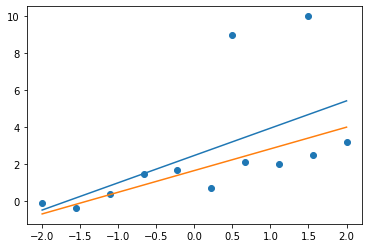

In [20]:
# X: 21x2 matrix, y: 21x1 matrix
# input_data 리스트를 column vector로 바꾼 다음 np.append 함수로 상수항을 추가.
X = np.append(input_data.reshape((-1, 1)), np.ones((num_samples+2, 1)), axis=1)
y = labels

# MLE 파라미터 계산식
mle_theta_1, mle_theta_0 = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
# MAP 파라미터 계산식
map_theta_1, map_theta_0 = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)+(0.1*0.1)/(0.04*0.04)*np.eye(2)), X.T), y)

print('[MLE result] (blue)')
print('slope: '+'%.4f'%mle_theta_1+' bias: '+'%.4f'%mle_theta_0)

mle_preds = mle_theta_1 * input_data + mle_theta_0
print('likelihood: '+'%.4e'%likelihood(labels, mle_preds))
print('negative log likelihood: '+'%.4e\n'%neg_log_likelihood(labels, mle_preds))

print('[MAP result] (orange)')
print('slope: '+'%.4f'%map_theta_1+' bias: '+'%.4f'%map_theta_0)

map_preds = map_theta_1 * input_data + map_theta_0
print('likelihood: '+'%.4e'%likelihood(labels, map_preds))
print('negative log likelihood: '+'%.4e'%neg_log_likelihood(labels, map_preds))

model_x = np.linspace(-2, 2, 50)
mle_model_y = mle_theta_1 * model_x + mle_theta_0
map_model_y = map_theta_1 * model_x + map_theta_0

plt.scatter(input_data, labels)
plt.plot(model_x, mle_model_y)
plt.plot(model_x, map_model_y)
plt.show()

위 그래프에서 파란색 직선과 주황색 직선은 각각 MLE, MAP 를 이용해 찾은 모델.

파란색 직선은 이상치 데이터까지 포함한 neg log likelihood 를 감소시키기 위해 직선이 위로 치우쳐서 아래쪽 10개 데이터의 경향성에서는 약간 벗어남. 

반면 주황색 직선은 이상치 데이터가 추가되어도 아래쪽 데이터에서 크게 벗어나지는 않음.

원래 데이터 분포에서 멀리떨어진 이상치 데이터가 추가되었기 때문에, likelihood 의 값은 언더플로우가 발생해 0으로 표시.

neg log likelihood 값을 보면 MLE 결과와 MAP 결과를 비교할수있음. 

MAP 가 MLE 에 비해 neg log likelihood 값이 크지만 (= likelihood 가 작지만) 이상치 데이터가 추가되었을때 모델 파라미터의 변화는 MLE 보다 작음.